Yichuan Philip Ma

CS506 Project

BPDA Brazilian Census Team 2

Visualizations for Brazilians in Massachusetts and the US by Educational Attainment (of those 25 and up)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extract_data import extract_data

In [3]:
import os

directory_name = 'EducationalAttainment'
directory = f'../{directory_name}'
if not os.path.exists(directory):
    os.makedirs(directory)

MA state code is 25.

Educational attainment data is in rows 30-33 for each year.

In [8]:
start = 30
end = 33
ea = extract_data(start, end, start_year=2012)
ea.to_csv(f"{directory}/Educational Attainment 2012-2019.csv")

In [5]:
ea_MA_all = []
ea_national_all = []
years = list(range(2012, 2019+1))
labels = list(ea['State Code'].drop_duplicates())
for year in years:
    ea_year = ea[ea['Year'] == year]
    ea_MA_year = [year]
    ea_national_year = [year]
    for i in range(end - start + 1):
        ea_MA_year.append(ea_year[25].iloc[i])
        ea_national_year.append(sum(ea_year.iloc[i,3:]))
    ea_MA_all.append(ea_MA_year)
    ea_national_all.append(ea_national_year)

The following stacked bar chart shows the change in education attainment of Brazilians 25+ in Massachusetts between 2012-2019.

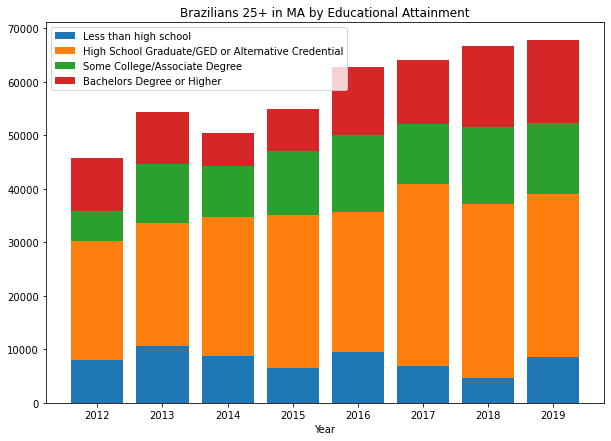

In [6]:
ea_MA_all = np.array(ea_MA_all)
fig, ax = plt.subplots(figsize = (10, 7))
bottom = np.zeros(len(years))
for i in range(end - start + 1):
    values = ea_MA_all[:,i+1]
    ax.bar(years, values, label=labels[i], bottom=bottom)
    bottom += values
ax.set_xlabel('Year')
ax.set_title('Brazilians 25+ in MA by Educational Attainment')
ax.legend()
plt.savefig(f"{directory}/BR_EA_Mass_since2012.png")
plt.show()

The following stacked bar chart shows the change in education attainment of Brazilians 25+ nationwide between 2012-2019.

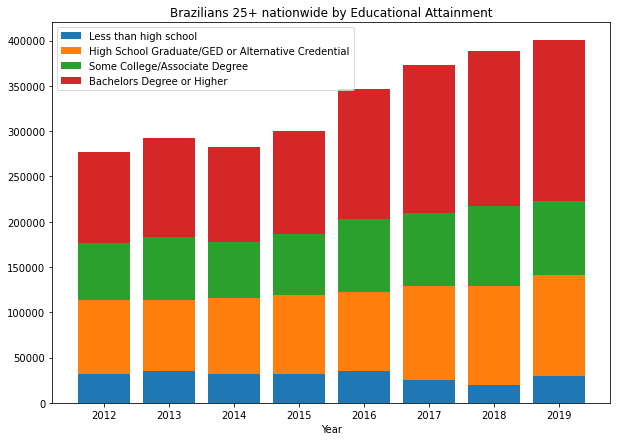

In [7]:
ea_national_all = np.array(ea_national_all)
fig, ax = plt.subplots(figsize = (10, 7))
bottom = np.zeros(len(years))
for i in range(end - start + 1):
    values = ea_national_all[:,i+1]
    ax.bar(years, values, label=labels[i], bottom=bottom)
    bottom += values
ax.set_xlabel('Year')
ax.set_title('Brazilians 25+ nationwide by Educational Attainment')
ax.legend()
plt.savefig(f"{directory}/BR_EA_national_since2012.png")
plt.show()